In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# pip show matplotlib

Name: matplotlib
Version: 3.7.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\Python3.11\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn
Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install -U matplotlib==3.7.3

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
PATH = "R:\R Prog\Datasets"
trainf = "train_loan.csv"
testf = "test_loan.csv"


In [5]:
datatr = pd.read_csv(os.path.join(PATH, trainf))

In [6]:
datatr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
datatr.shape

(614, 13)

In [11]:
datatr = datatr.set_index("Loan_ID")

In [12]:
datatr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
datatr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [14]:
target = "Loan_Status"
numcol = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
catcol = ["Gender","Married","Dependents","Education","Self_Employed","Credit_History","Property_Area"]

In [15]:
datatr[numcol].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


ApplicationIncome has Right-skewed dist
Loan Left

In [16]:
datatr[catcol].describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
import warnings
warnings.filterwarnings("ignore")

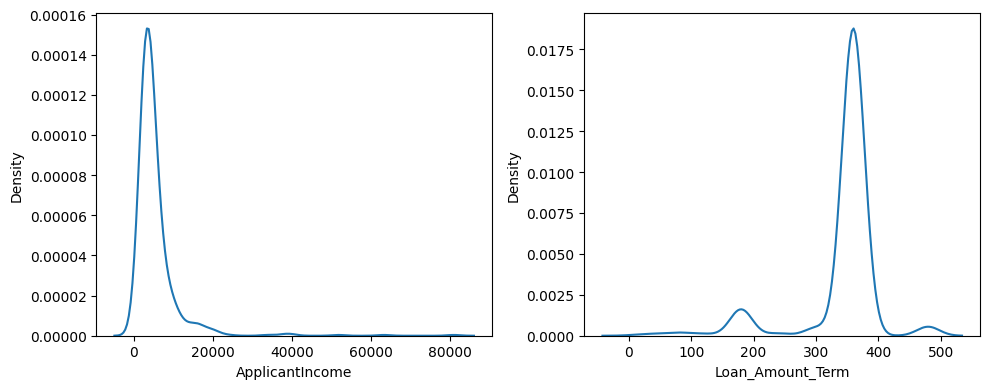

In [21]:
import seaborn as sns

fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.kdeplot(datatr["ApplicantIncome"],ax=ax[0],label="Applicant Income")
sns.kdeplot(datatr["Loan_Amount_Term"],ax=ax[1],label="Loan Amount Term")
plt.tight_layout()

In [22]:
datatr[catcol].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
count,601,611,599,614,582,564.000000,614
unique,2,2,4,2,2,NaN,3
top,Male,Yes,0,Graduate,No,NaN,Semiurban
freq,489,398,345,480,500,NaN,233
mean,NaN,NaN,NaN,NaN,NaN,0.842199,NaN
std,NaN,NaN,NaN,NaN,NaN,0.364878,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [24]:
for feature in catcol:
    t = datatr[feature].value_counts()
    print(t)
    print('=-'*10)
    print()

Gender
Male      489
Female    112
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Married
Yes    398
No     213
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Self_Employed
No     500
Yes     82
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
=-=-=-=-=-=-=-=-=-=-



In [25]:
datatr[target].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [26]:
datatr.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we need to define strategy for each attribute depending on its nature
• Gender & Married: include a third category 'not defined' [nominal attribute)
• Dependents: impute using mode value
• Self-employed: use mode
• LoanAmount: drop the records (very important feature for loan approval)
• Loan_Amount_Term: use median imputation
• Credit history: use mode